Dataset: This analysis provides a snapshot of the current situation regarding confirmed, recovered, and death cases of COVID-19 globally.
Study Objective: Analyse its infection pattern in various countries and the analysis of the the similar situation in India


In [33]:
#import the important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
from datetime import timedelta


In [7]:
covid=pd.read_csv("covid_19_data.csv") #loads dataset
covid.head() #gives first 5 values

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [10]:
print("Size/Shape of the datset",covid.shape)             # prints size/shape of the dataset, no. of rows and columns
print("Checking for null values",covid.isnull().sum())    #sum of null values
print("Checking Data-type", covid.dtypes)                 #prints type of datatype

Size/Shape of the datset (18327, 8)
Checking for null values SNo                   0
ObservationDate       0
Province/State     9280
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
Checking Data-type SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [14]:
#Dropping the column 'Sno' as it seems to be unnecessary, axis 0 is rows and axis 1 is columns
#inplace=True parameter makes sure that the modification is applied to the DataFrame directly.

covid.drop("SNo", axis=1, inplace=True)

In [15]:
#The observation column is in day, month and year column, for easier analysis this should be changed to Year month and day format.

covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [16]:
covid["ObservationDate"]  #this is now converted to date time format

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
18322   2020-04-24
18323   2020-04-24
18324   2020-04-24
18325   2020-04-24
18326   2020-04-24
Name: ObservationDate, Length: 18327, dtype: datetime64[ns]

In [18]:
#Grouping different types of cases as per the date by using aggregration, in pandas we use group by for this(iloc is for index locate for all value)

datewise=covid.groupby(['ObservationDate']).agg({"Confirmed":'sum', "Recovered": "sum", "Deaths": "sum"})

In [25]:
print("Basic Analysis")
print("Total number of Confirmed cases around the world", datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world", datewise["Recovered"].iloc[-1])
print("Total number of Death cases around the world", datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world",datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1])
print("Total number of closed cases around the world",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])

Basic Analysis
Total number of Confirmed cases around the world 2811193.0
Total number of Recovered cases around the world 793601.0
Total number of Death cases around the world 197159.0
Total number of Active cases around the world 1820433.0
Total number of closed cases around the world 990760.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 [Text(0, 0, '2020-01-22'),
  Text(1, 0, '2020-01-23'),
  Text(2, 0, '2020-01-24'),
  Text(3, 0, '2020-01-25'),
  Text(4, 0, '2020-01-26'),
  Text(5, 0, '2020-01-27'),
  Text(6, 0, '2020-01-28'),
  Text(7, 0, '2020-01-29'),
  Text(8, 0, '2020-01-30'),
  Text(9, 0, '2020-01-31'),
  Text(10, 0, '2020-02-01'),
  Text(11, 0, '2020-02-02'),
  Text(12, 0, '2020-02-03'),
  Text(13, 0, '2020-02-04'),
  Text(14, 0, '2020-02-05'),
  Text(15, 0, '2020-02-06'),
  Text(16, 0, '2020-02-07'),
  Text(17, 0, '2020-02-08'),
  Text(18, 0, '2020-02-09'),
  Text(19, 0, '2020-02-10'),
  Te

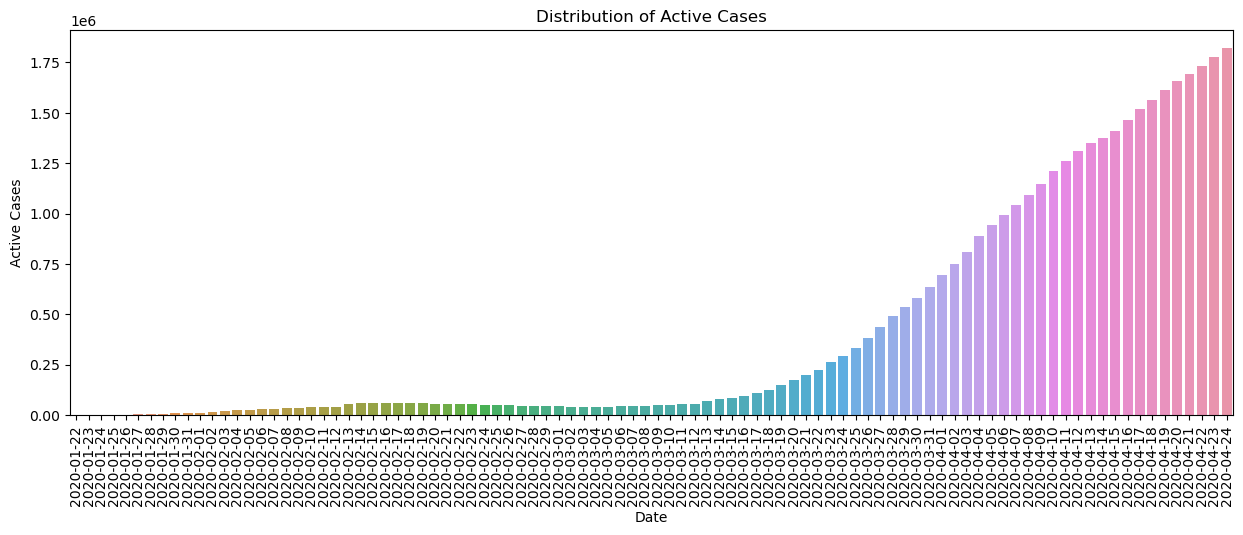

In [30]:
#bar plot for sitribution of 2 categories
plt.figure(figsize=(15,5))  
sns.barplot(x = datewise.index.date, y = datewise["Confirmed"] - datewise["Recovered"] - datewise["Deaths"])
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.title("Distribution of Active Cases")
plt.xticks(rotation=90)

As the growth is exponential, the plot shows a linear trend, which can be indicative of exponential growth fom the month of march for COVID-19 cases.
This is a common pattern observed in infectious disease outbreaks like COVID-19.

Next step would be to analyse daily increase in covid-19 cases globally

Average increase in number of Confirmed cases everyday: 29900.0
Average increase in number of Recovered cases everyday: 8442.0
Average increase in number of Death cases everyday: 2097.0


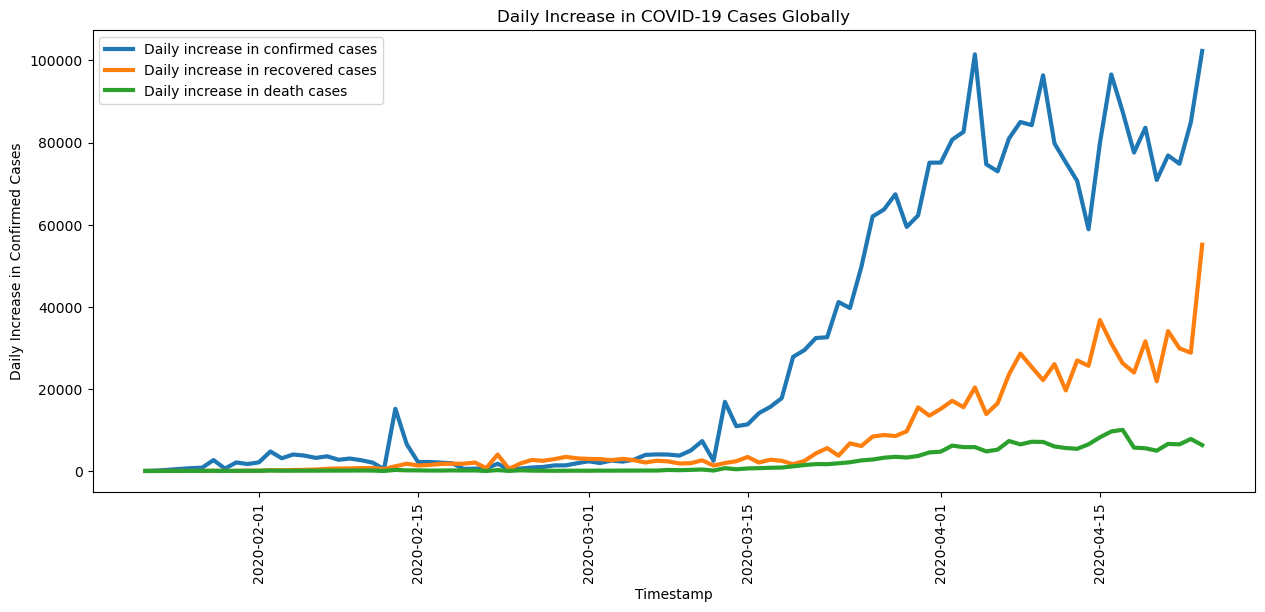

In [35]:
print("Average increase in number of Confirmed cases everyday:",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday:",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Death cases everyday:",np.round(datewise["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increase in Confirmed Cases")
plt.title("Daily Increase in COVID-19 Cases Globally")
plt.legend()
plt.xticks(rotation=90)
plt.show()

The line graph highlights a notable finding: the average daily increase in the number of confirmed cases is 29,900. This observation is concerning, indicating a significant and consistent rise in infections.

In [ ]:
#Countrywise analysis


In [36]:
#Calculating Country wise Mortality rate

countrywise= covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["Recovered"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

Text(0.5, 1.0, 'Top 15 countries as per number of death cases')

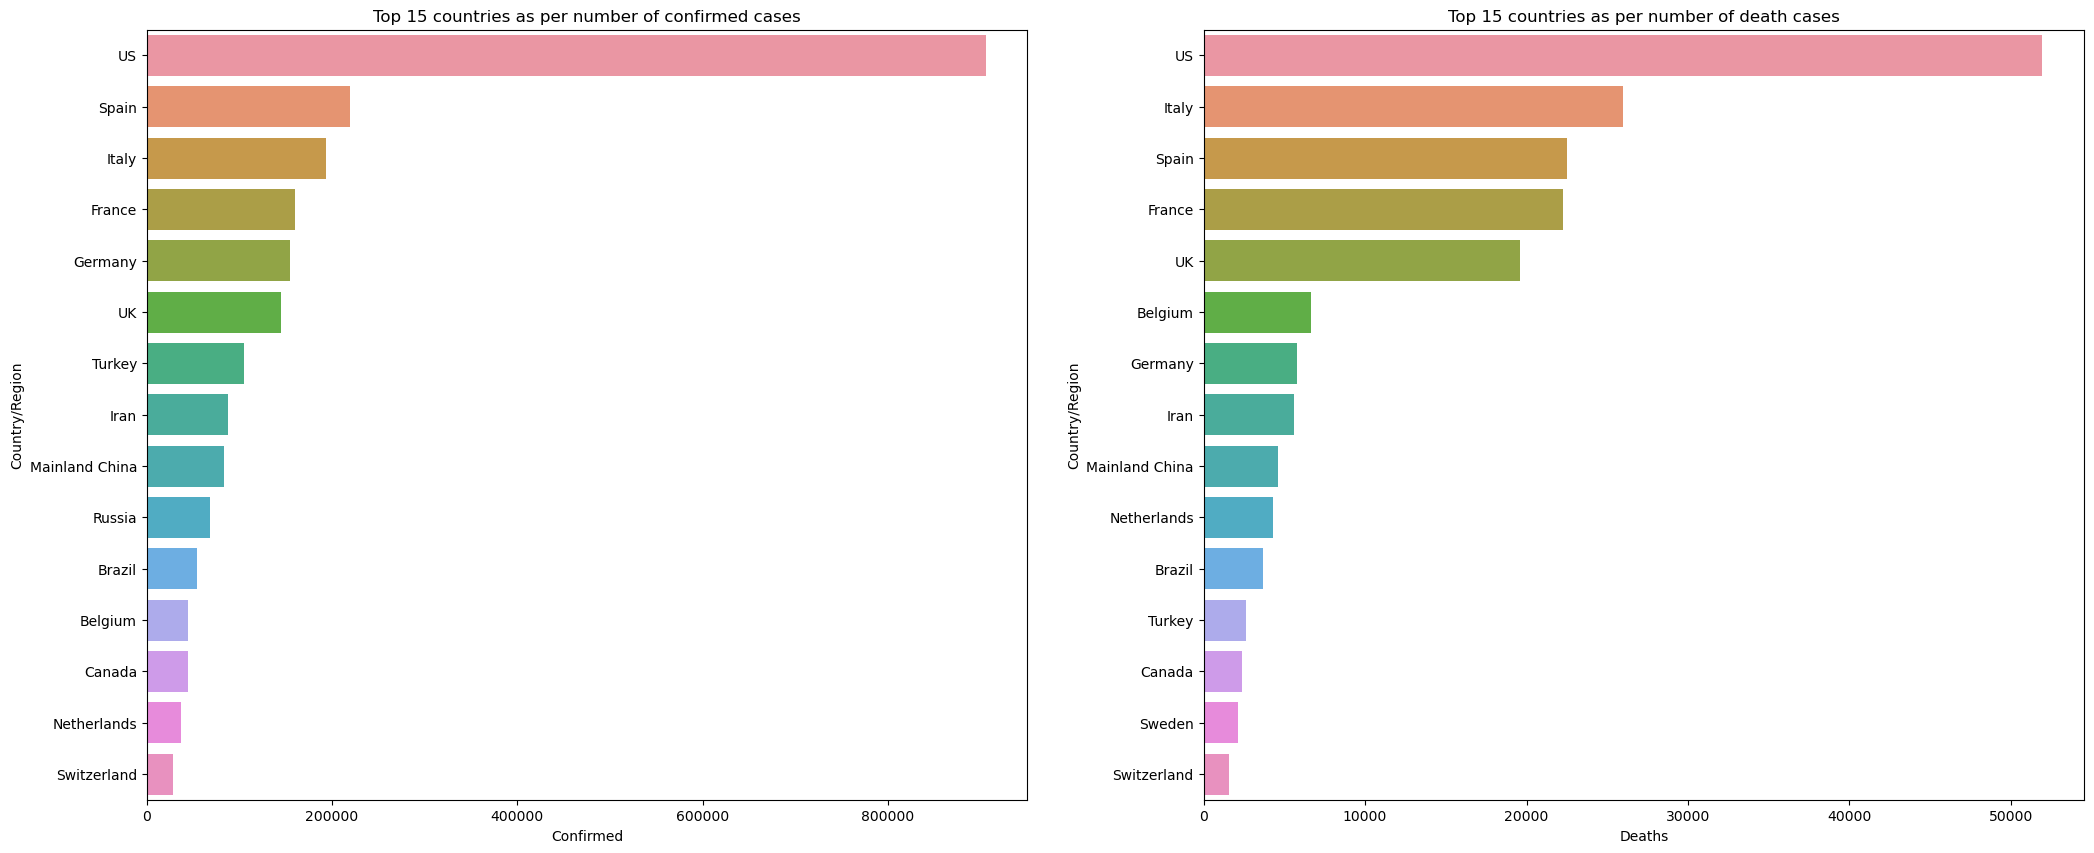

In [42]:
#lets analyse countrywise Mortality rate and Recovery rate with the help of barlpot

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per number of confirmed cases")
sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per number of death cases")

The graph illustrates that the United States has the highest number of confirmed cases as well as the highest number of deaths attributed to COVID-19 in 2020."

In [43]:
#Data Analysis for COVID-19 in India.
india_data = covid[covid["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Active Cases",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    24530.0
Recovered     5498.0
Deaths         780.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active Cases 18252.0
Total Closed Cases 6278.0


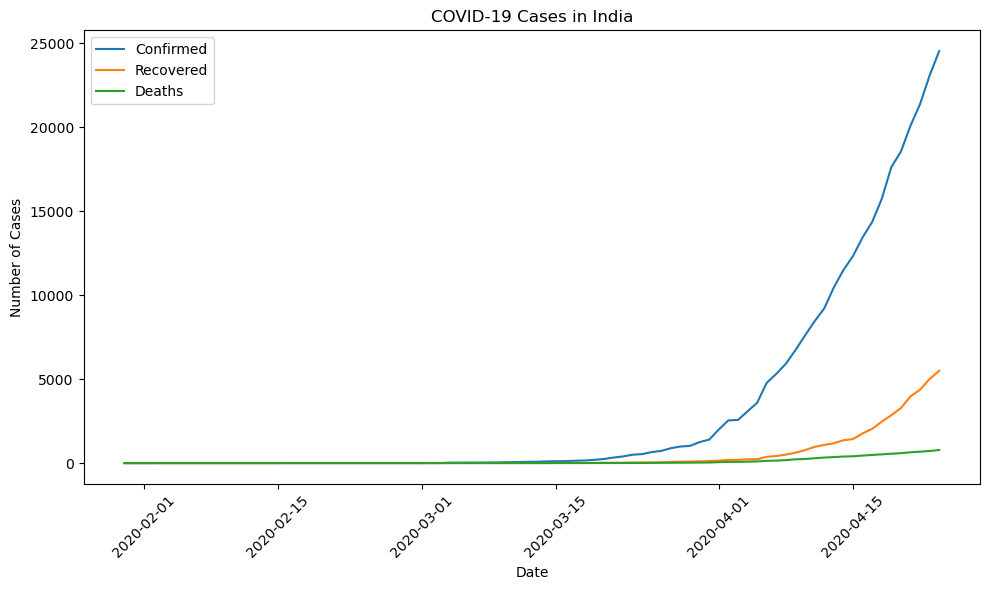

In [50]:
#A line plot showing the total confirmed cases, total recovered cases, and total deaths reported in India over time. Each line represents the respective metric, and the x-axis represents the observation dates. The legend indicates which line corresponds to each metric

# Plotting total confirmed cases
plt.plot(datewise_india.index, datewise_india['Confirmed'], label='Confirmed')

# Plotting total recovered cases
plt.plot(datewise_india.index, datewise_india['Recovered'], label='Recovered')

# Plotting total deaths
plt.plot(datewise_india.index, datewise_india['Deaths'], label='Deaths')

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases in India')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Interpretation: This analysis suggests that although India has experienced relatively lower case numbers compared to other countries in 2020, there has been a noticeable increase in active cases since March. This could imply that despite initially managing the situation well, the country is now facing a significant rise in COVID-19 infections, leading to a higher number of currently infected individuals.